In [12]:
import pandas as pd
import numpy as np
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import statistics
from matplotlib import pyplot
from collections import Counter
from numpy import where
from mpl_toolkits.mplot3d import Axes3D

In [13]:
result = pd.read_csv("Doc2Vec Titles - Weighted Factor.csv", encoding = "ISO-8859-1")

In [14]:
print(result)

      Unnamed: 0         0         1         2         3         4         5  \
0              0 -0.002941  0.003448  0.001992 -0.001076  0.001927 -0.004839   
1              1 -0.001294  0.003404 -0.001227  0.000506 -0.000340  0.003344   
2              2  0.009658 -0.009947 -0.005356  0.000006  0.006875  0.010328   
3              3  0.004296  0.006316  0.011815 -0.001639  0.001203  0.002728   
4              4 -0.002163  0.005563  0.003652  0.002354  0.002788  0.002126   
...          ...       ...       ...       ...       ...       ...       ...   
2449        2449 -0.002028 -0.000067 -0.002026  0.002360 -0.001204  0.001114   
2450        2450 -0.002028 -0.000067 -0.002026  0.002360 -0.001204  0.001114   
2451        2451 -0.000518 -0.009820  0.008393  0.004051  0.016970  0.005586   
2452        2452 -0.001058 -0.001996  0.000759 -0.000564 -0.001499  0.003161   
2453        2453  0.003176 -0.001483 -0.004353 -0.000864  0.004825  0.000237   

             6         7         8  ...

In [15]:
from collections import Counter

print(Counter(result['Label']))
result.groupby("Label").count()

Counter({"Don't move": 1473, 'Buy': 515, 'Sell': 466})


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
Label,,,,,,,,,,,,,,,,,,,,,
Buy,515,515,515,515,515,515,515,515,515,515,...,515,515,515,515,515,515,515,515,515,515
Don't move,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,...,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473
Sell,466,466,466,466,466,466,466,466,466,466,...,466,466,466,466,466,466,466,466,466,466


In [16]:
pip install --user imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
# check version number and check if it's been installed
import imblearn
print(imblearn.__version__)

0.6.2


In [18]:
y = result['Label']
del result['Label']

In [19]:
del result[ 'Unnamed: 0']
result.drop(result.index[[0]])

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
1,-0.001294,0.003404,-0.001227,0.000506,-0.000340,0.003344,-0.001729,-0.002544,-0.004084,0.007843,...,0.002817,0.009200,0.005817,-0.000007,-0.003598,-0.005208,-0.001883,-0.000041,0.005663,2.653061
2,0.009658,-0.009947,-0.005356,0.000006,0.006875,0.010328,-0.016886,-0.011126,-0.010848,-0.014954,...,0.022638,-0.006065,0.024322,-0.016470,0.005960,-0.010316,-0.006694,-0.000065,-0.041960,5.555556
3,0.004296,0.006316,0.011815,-0.001639,0.001203,0.002728,-0.013030,0.005086,0.002766,-0.005805,...,-0.015906,0.007273,0.008086,-0.001788,0.001948,-0.008862,-0.011240,0.014136,-0.006245,6.209150
4,-0.002163,0.005563,0.003652,0.002354,0.002788,0.002126,0.000664,0.005628,0.000247,0.001784,...,-0.001937,0.003677,0.003492,-0.003999,-0.008461,-0.017565,-0.006009,0.006691,-0.004138,1.330377
5,0.002181,-0.040099,-0.003733,-0.006015,0.015561,-0.038637,-0.004820,-0.014780,-0.001112,-0.004414,...,-0.041556,0.048237,0.015840,0.003343,-0.015214,-0.018954,-0.019778,-0.009822,0.005961,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,-0.002028,-0.000067,-0.002026,0.002360,-0.001204,0.001114,-0.003574,0.002100,0.003430,0.004309,...,0.003842,-0.002664,0.004417,0.004108,0.002644,-0.001050,-0.001201,-0.000912,0.003932,6.122449
2450,-0.002028,-0.000067,-0.002026,0.002360,-0.001204,0.001114,-0.003574,0.002100,0.003430,0.004309,...,0.003842,-0.002664,0.004417,0.004108,0.002644,-0.001050,-0.001201,-0.000912,0.003932,6.122449
2451,-0.000518,-0.009820,0.008393,0.004051,0.016970,0.005586,-0.004056,-0.002247,0.010091,-0.004079,...,-0.000150,0.001247,0.000261,0.008625,0.000110,-0.015375,-0.010646,0.000794,0.013640,2.777778
2452,-0.001058,-0.001996,0.000759,-0.000564,-0.001499,0.003161,-0.000525,0.004677,0.002401,-0.002597,...,-0.001494,-0.002517,0.000238,0.003309,-0.002394,0.002553,0.000649,-0.003360,-0.002406,17.142857


Counter({"Don't move": 1473, 'Buy': 515, 'Sell': 466})


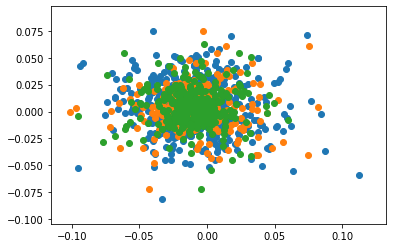

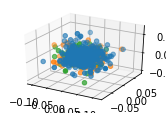

In [20]:
result1 = np.array(result)
print(Counter(y))
counter = Counter(y)
result1 = np.array(result)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(result1[row_ix,50], result1[row_ix,55], label=str(label))
plt.show()
fig = plt.figure()
ax = fig.add_subplot(222, projection = '3d')
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    ax.scatter(result1[row_ix,50], result1[row_ix,55], result1[row_ix,56], label=str(label))
plt.show()

In [21]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
result, y = oversample.fit_resample(result, y)

Counter({"Don't move": 1473, 'Buy': 1473, 'Sell': 1473})


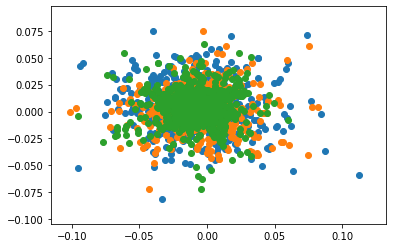

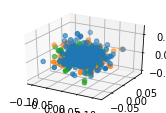

In [22]:
print(Counter(y))
result1 = np.array(result)
counter = Counter(y)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(result1[row_ix,50], result1[row_ix,55], label=str(label))
plt.show()
fig = plt.figure()
ax = fig.add_subplot(222, projection = '3d')
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    ax.scatter(result1[row_ix,50], result1[row_ix,55], result1[row_ix,56], label=str(label))
plt.show()

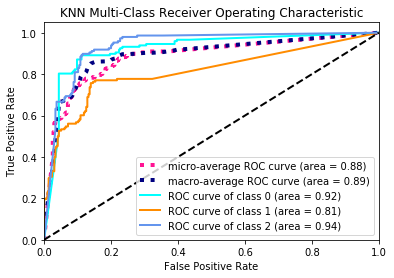

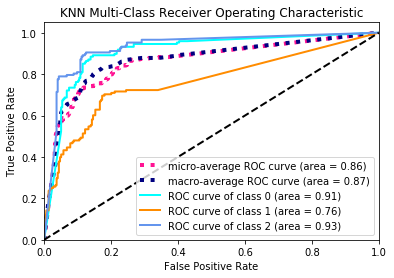

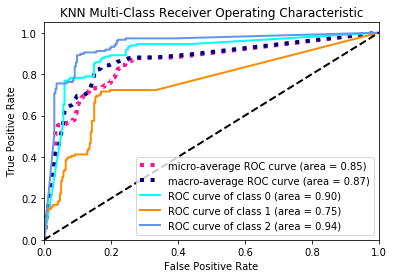

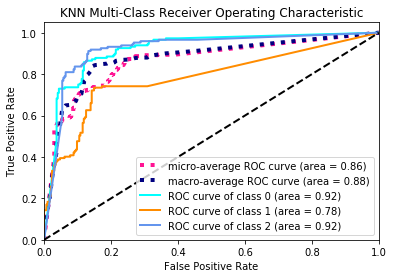

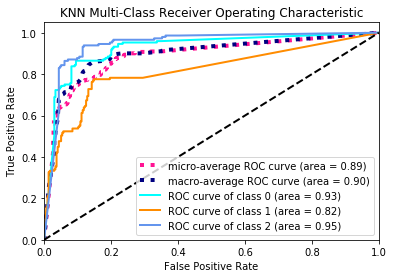

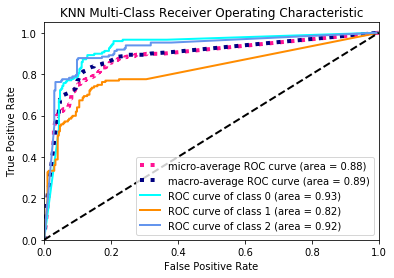

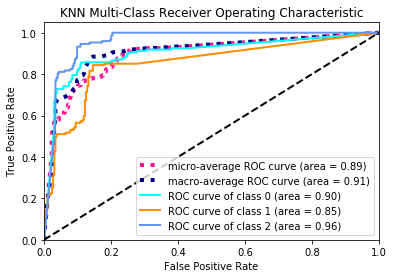

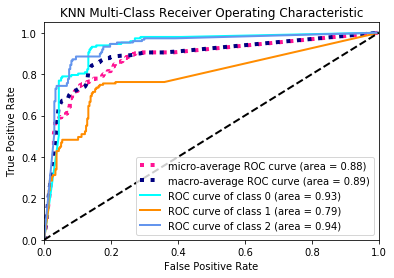

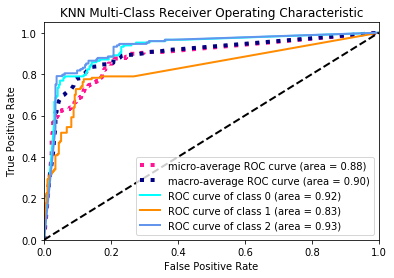

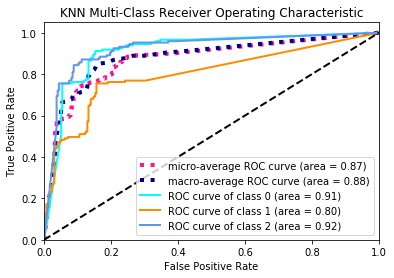

0.8761444944078048

In [23]:
#KNN ROC Curves (some code from #https://scikit-learn.org/stable/)
X_data = result
y_data = y

knn_macro_list = []
knn_micro_list = []
knn_auc_list = []
acc_knn_score1 = []


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
for train_index, test_index in skf.split(result, y):
    train_news, test_news = result.iloc[train_index], result.iloc[test_index]
    train_labels, test_labels = y[train_index], y[test_index]
    
    le = preprocessing.LabelEncoder()
    le.fit(train_labels)
    classes_name=le.classes_
    le.transform(train_labels)
    
    # Binarize the output
    train_labels = le.transform(train_labels)
    test_labels = le.transform(test_labels)
    
    train_labels = label_binarize(train_labels, classes=[0,1,2])
    test_labels = label_binarize(test_labels, classes=[0,1,2])

    n_classes = train_labels.shape[1]
    
    #K-Nearest Neighbour
    knn = KNeighborsClassifier(n_neighbors=4,weights='distance',leaf_size=10)

    acc_knn_score1.append(knn.fit(train_news,train_labels).score(test_news, test_labels))
    
    # Learn to predict each class against the other
    knn_classifier = OneVsRestClassifier(knn)
    knn_score = knn_classifier.fit(train_news, train_labels).predict_proba(test_news)
    acc_knn_score = knn_classifier.score(test_news, test_labels)
    
    # Compute ROC curve and ROC area for each class
    knn_false_positive_rate = dict()
    knn_true_positive_rate = dict()
    knn_roc_auc = dict()
    for i in range(n_classes):
        knn_false_positive_rate[i], knn_true_positive_rate[i], _ = roc_curve(test_labels[:, i], knn_score[:, i])
        knn_roc_auc[i] = auc(knn_false_positive_rate[i], knn_true_positive_rate[i])

    # Compute micro-average ROC curve and ROC area
    knn_false_positive_rate["micro"], knn_true_positive_rate["micro"], _ = roc_curve(test_labels.ravel(), knn_score.ravel())
    knn_roc_auc["micro"] = auc(knn_false_positive_rate["micro"], knn_true_positive_rate["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_knn_fpr = np.unique(np.concatenate([knn_false_positive_rate[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_knn_tpr = np.zeros_like(all_knn_fpr)
    for i in range(n_classes):
        mean_knn_tpr += interp(all_knn_fpr, knn_false_positive_rate[i], knn_true_positive_rate[i])

    # Finally average it and compute AUC
    mean_knn_tpr /= n_classes

    knn_false_positive_rate["macro"] = all_knn_fpr
    knn_true_positive_rate["macro"] = mean_knn_tpr
    knn_roc_auc["macro"] = auc(knn_false_positive_rate["macro"], knn_true_positive_rate["macro"])

    # Plot all ROC curves
    lw=2
    plt.figure()
    plt.plot(knn_false_positive_rate["micro"], knn_true_positive_rate["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(knn_roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(knn_false_positive_rate["macro"], knn_true_positive_rate["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(knn_roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(knn_false_positive_rate[i], knn_true_positive_rate[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, knn_roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN Multi-Class Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    knn_macro_list.append(knn_roc_auc["macro"])
    knn_micro_list.append(knn_roc_auc["micro"])

max(knn_macro_list)
min(knn_macro_list)
np.mean(knn_macro_list)

max(knn_micro_list)
min(knn_micro_list)
np.mean(knn_micro_list)

In [24]:
#KNN Grid Search (some code from #https://scikit-learn.org/stable/)
from itertools import product

knn_neighbours = [2,3,4,5,10]
knn_weights = ['uniform','distance']
knn_leaf = [10,20,30,40,80]

knn_grid_search = list(product(knn_neighbours,knn_weights,knn_leaf))
knn_grid_results = {}

for option in knn_grid_search:
    knn_neighbours = option[0]
    knn_weights =  option[1]
    knn_leaf = option[2]
    
    X_data = result
    y_data = y
    
#     X_data = test_empty_df
#     y_data = result["Label"]

    knn_macro_list = []
    knn_micro_list = []
    knn_auc_list = []
    acc_knn_score1 = []


    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    for train_index, test_index in skf.split(result, y):
        train_news, test_news = result.iloc[train_index], result.iloc[test_index]
        train_labels, test_labels = y[train_index], y[test_index]

        le = preprocessing.LabelEncoder()
        le.fit(train_labels)
        classes_name=le.classes_
        le.transform(train_labels)

        # Binarize the output
        train_labels = le.transform(train_labels)
        test_labels = le.transform(test_labels)

        train_labels = label_binarize(train_labels, classes=[0,1,2])
        test_labels = label_binarize(test_labels, classes=[0,1,2])

        n_classes = train_labels.shape[1]

        #K-Nearest Neighbour
        knn = KNeighborsClassifier(n_neighbors=knn_neighbours,weights=knn_weights,leaf_size=knn_leaf)

        acc_knn_score1.append(knn.fit(train_news,train_labels).score(test_news, test_labels))

        # Learn to predict each class against the other
        knn_classifier = OneVsRestClassifier(knn)
        knn_score = knn_classifier.fit(train_news, train_labels).predict_proba(test_news)
        acc_knn_score = knn_classifier.score(test_news, test_labels)

        # Compute ROC curve and ROC area for each class
        knn_false_positive_rate = dict()
        knn_true_positive_rate = dict()
        knn_roc_auc = dict()
        for i in range(n_classes):
            knn_false_positive_rate[i], knn_true_positive_rate[i], _ = roc_curve(test_labels[:, i], knn_score[:, i])
            knn_roc_auc[i] = auc(knn_false_positive_rate[i], knn_true_positive_rate[i])

        # Compute micro-average ROC curve and ROC area
        knn_false_positive_rate["micro"], knn_true_positive_rate["micro"], _ = roc_curve(test_labels.ravel(), knn_score.ravel())
        knn_roc_auc["micro"] = auc(knn_false_positive_rate["micro"], knn_true_positive_rate["micro"])

        # Compute macro-average ROC curve and ROC area

        # First aggregate all false positive rates
        all_knn_fpr = np.unique(np.concatenate([knn_false_positive_rate[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_knn_tpr = np.zeros_like(all_knn_fpr)
        for i in range(n_classes):
            mean_knn_tpr += interp(all_knn_fpr, knn_false_positive_rate[i], knn_true_positive_rate[i])

        # Finally average it and compute AUC
        mean_knn_tpr /= n_classes

        knn_false_positive_rate["macro"] = all_knn_fpr
        knn_true_positive_rate["macro"] = mean_knn_tpr
        knn_roc_auc["macro"] = auc(knn_false_positive_rate["macro"], knn_true_positive_rate["macro"])

    print(knn_neighbours, knn_weights, knn_leaf, np.mean(acc_knn_score1))
    knn_grid_results[(option)] = np.mean(acc_knn_score1)
    
print(knn_grid_results)

2 uniform 10 0.6313602364022532
2 uniform 20 0.6245621325453257
2 uniform 30 0.6284216250602805
2 uniform 40 0.6259349893803675
2 uniform 80 0.6297785780979057
2 distance 10 0.797241973712562
2 distance 20 0.7931680364453474
2 distance 30 0.7911302982731555
2 distance 40 0.7947517468525872
2 distance 80 0.7976934363488986
3 uniform 10 0.6969921301854075
3 uniform 20 0.6931470023906999
3 uniform 30 0.6951698628169216
3 uniform 40 0.6897425636921435
3 uniform 80 0.6967674249186854
3 distance 10 0.735458285878454
3 distance 20 0.7313812704569008
3 distance 30 0.7374949979991997
3 distance 40 0.7347872482326265
3 distance 80 0.739772832209807
4 uniform 10 0.5596274407198777
4 uniform 20 0.5623439119237438
4 uniform 30 0.5598536850637691
4 uniform 40 0.5664204143195739
4 uniform 80 0.5643837021988283
4 distance 10 0.735687608376684
4 distance 20 0.7393059788017771
4 distance 30 0.7361406100901899
4 distance 40 0.7393085439303927
4 distance 80 0.7322872738839126
5 uniform 10 0.61958988723694